In [17]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install xgboost
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2


      ▄▀▀ ▄▄            
 ▄▄  ▀▀▀▀▀▀▀            
 ▀▀▀▀▀▀▀▀▀▀▀▀▄▄         
▄▄▀▀▀▀▀▀▀▀▀▀▀▀▀▀  ▀▀▄   
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀  ▀▀▀▄▀▄
 ▀▀▀▀▀▀▀▀▀▀▀▀▀   ▀▀▀▀▀▀▀
 ▄▀▀▀▀▀▀▀▀▀▀▀▀▄▀▀▀▀▀▀▀▀ 
  ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀   
   ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀   
    ▀▀▄▀▀▀▀▀▀▀▀▀▀▀▀▀▀▄  
     ▄▀▀▀▀▀▀▀▀  ▄▀▀▀▀▀  
    ▀▀▀▀▀▀▀▀▀▀▀ ▀▀▀▀▀   
     ▀▀▀ ▀▀▀▀▀▀         
          ▀▀▀           

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
        ▄▀▄ ▄▀▀   ▄▀▀         
 ▄▄    ▄▀▀▀▀▀▀▀▀▄▀▀▀▀         
▀▀▀▀▄▄▄▀▀▀▀▀▀▀▀▀▀▀▀▀          
 ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀          
      ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀         
      ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▄  ▄▄  
       ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▄
        ▄▀▀▀▀▀▀▀▀▀▀▀▀  ▀▀▀▀▀▀ 
      ▄▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▄       
 ▄▀▀▀▀▀▀▀▀ ▀▀▀   ▀▀▀▀▀▀▀      
  ▀▀▀▀▀▀▀▀                    

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
               ▄▀▀▀▄                     
          ▄▀▀▀▄▀▀▀▀▀▀▀▀▄                 
   

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('./Telco-Customer-Churn.csv')

print(df.head())

print(df.info())
print(df.describe())

print(df.columns)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


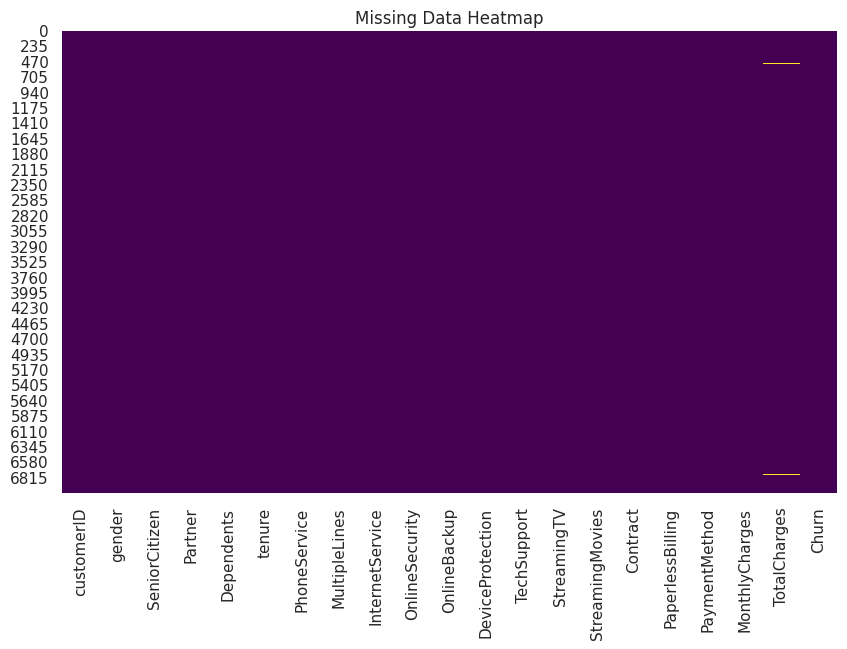

In [3]:

print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()  
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())


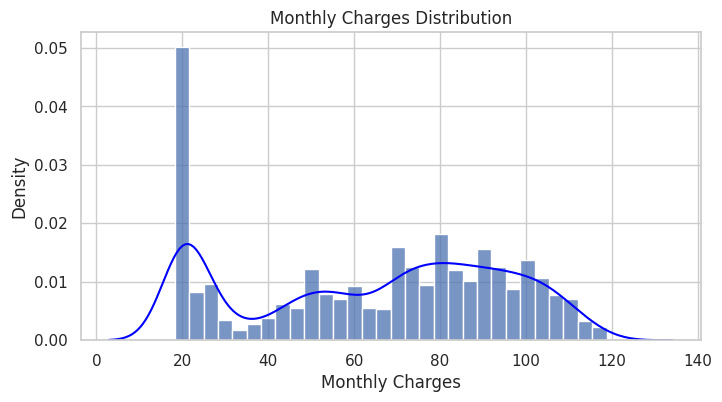

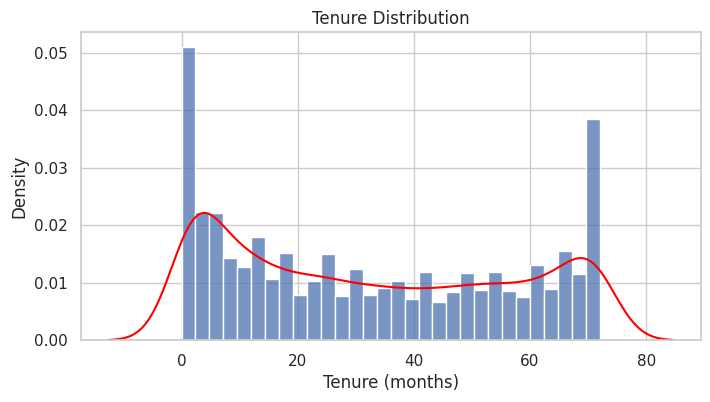

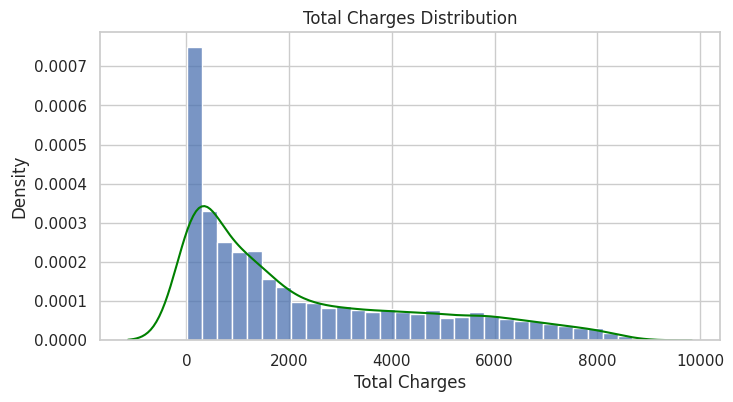

In [4]:
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], stat="density", bins=30)
sns.kdeplot(df['MonthlyCharges'], color="blue")
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], stat="density", bins=30)
sns.kdeplot(df['tenure'], color="red")
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['TotalCharges'], stat="density", bins=30)
sns.kdeplot(df['TotalCharges'], color="green")
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()


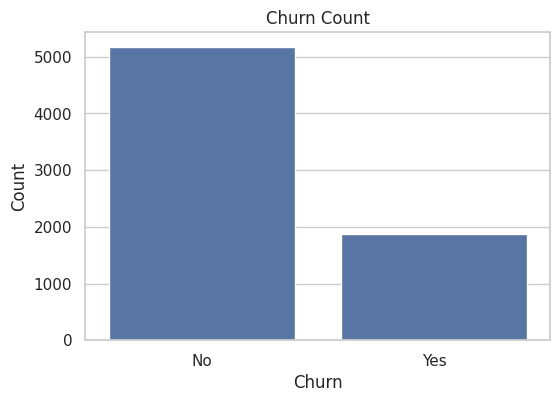

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.825464
MonthlyCharges  0.247900        1.000000      0.650864
TotalCharges    0.825464        0.650864      1.000000


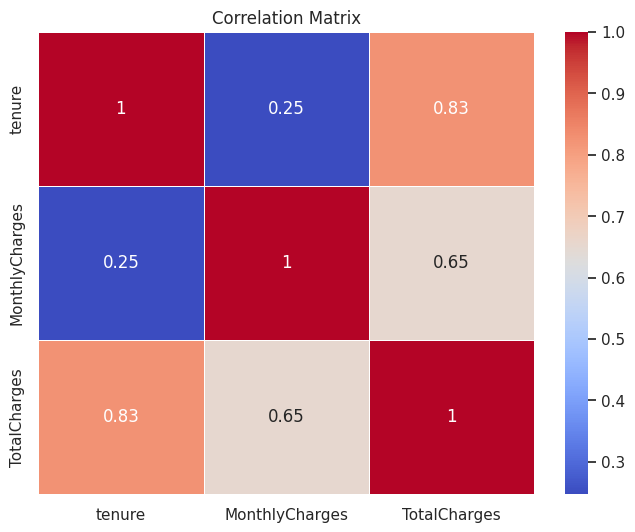

In [6]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


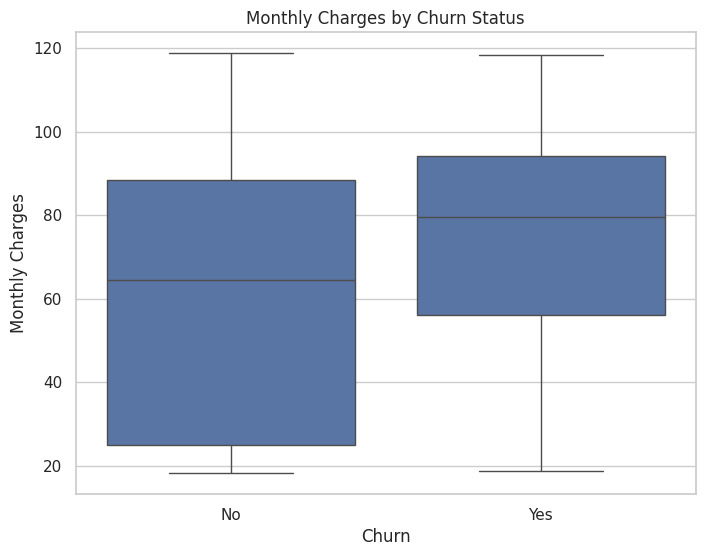

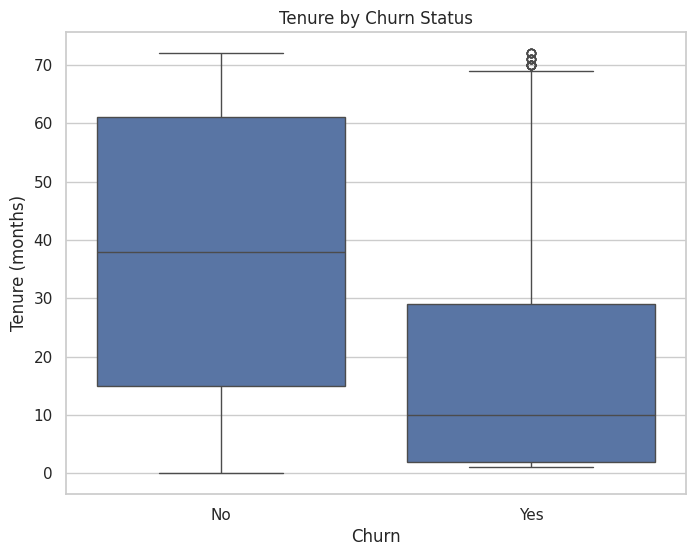

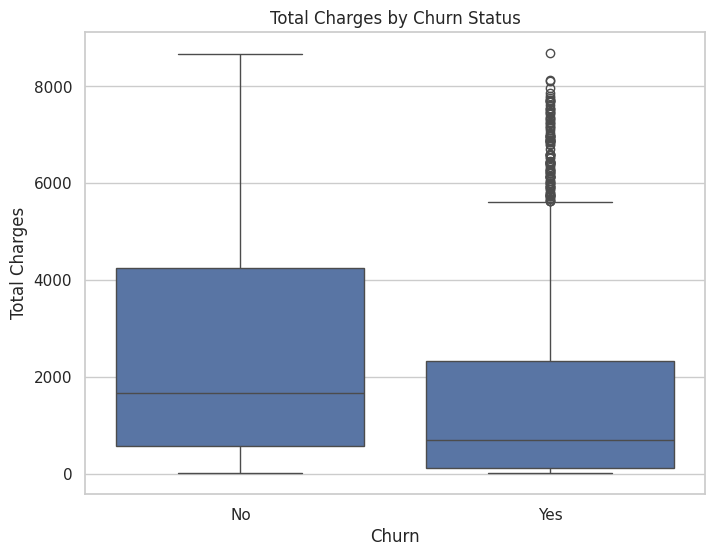

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


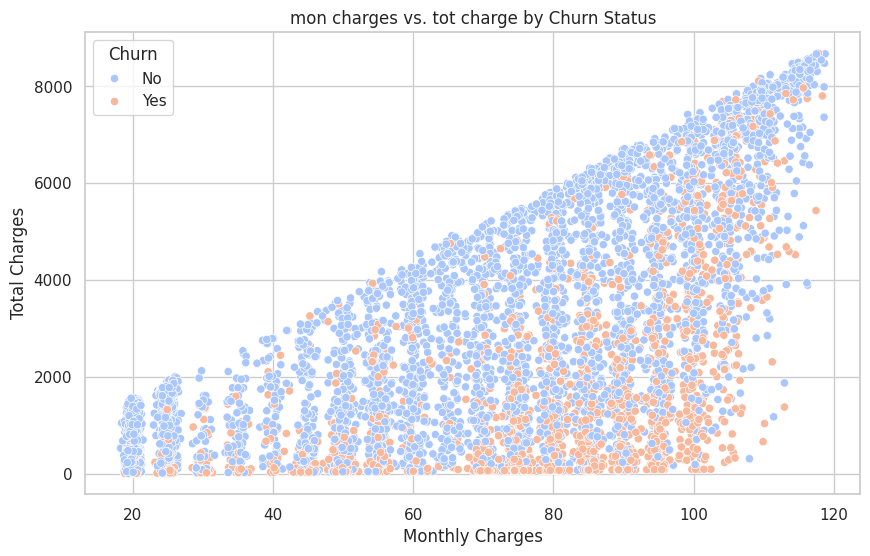

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df, palette='coolwarm')
plt.title('mon charges vs. tot charge by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


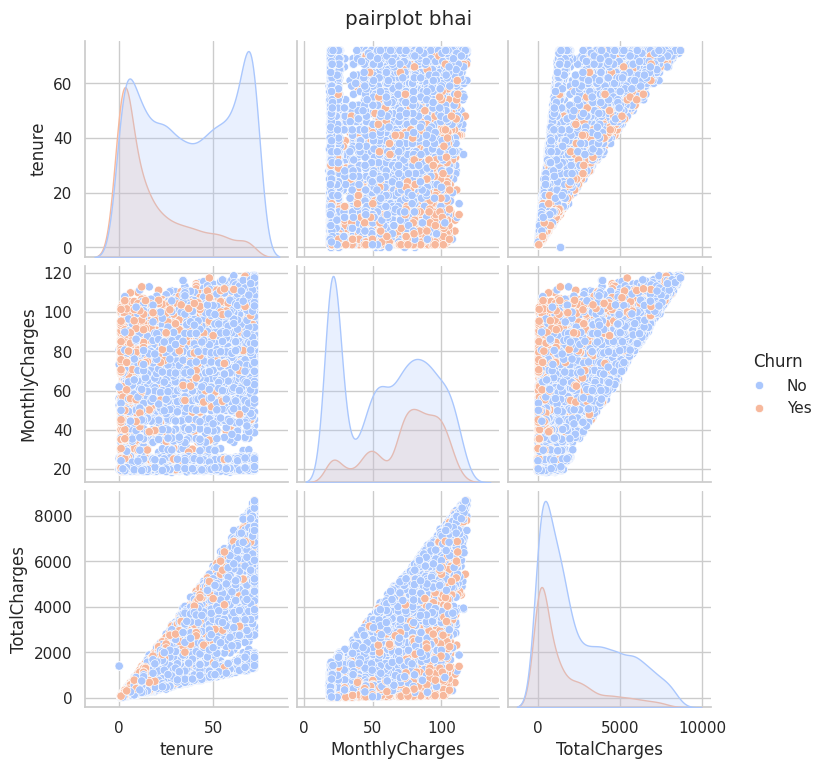

In [9]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='coolwarm')
plt.suptitle('pairplot bhai', y=1.02)
plt.show()


In [10]:
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in service_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

df['num_services'] = df[service_cols].sum(axis=1)


In [11]:
def tenure_bucket(tenure):
    if tenure <= 12:
        return '0-12'
    elif tenure <= 24:
        return '13-24'
    elif tenure <= 48:
        return '25-48'
    elif tenure <= 60:
        return '49-60'
    else:
        return '60+'

df['tenure_bucket'] = df['tenure'].apply(tenure_bucket)


In [12]:
df['AvgChargePerMonth'] = np.where(df['tenure'] > 0, df['TotalCharges'] / df['tenure'], df['MonthlyCharges'])
df['Contract_Payment'] = df['Contract'] + '_' + df['PaymentMethod']
df['has_internet'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)
categorical_features = ['gender', 'Partner', 'Dependents', 'tenure_bucket', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Contract_Payment']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


print(df_encoded.columns)


Index(['customerID', 'SeniorCitizen', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'num_services',
       'AvgChargePerMonth', 'has_internet', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'tenure_bucket_13-24', 'tenure_bucket_25-48',
       'tenure_bucket_49-60', 'tenure_bucket_60+', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Payment_Month-to-month_Credit card (automatic)',
       'Contract_Payment_Month-to-month_Electronic check',
       'Contract_Payment_Month-to-month_Mailed check',
       'Contract_Payment_One year_Bank transfer (automatic)',
       'Contract_Payment_One year_Credit card (automatic)',
       'Contract_Payment_On

In [13]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_train_features = pd.DataFrame(encoder.fit_transform(X_train[['InternetService']]))
encoded_test_features = pd.DataFrame(encoder.transform(X_test[['InternetService']]))

encoded_train_features.columns = encoder.get_feature_names_out(['InternetService'])
encoded_test_features.columns = encoder.get_feature_names_out(['InternetService'])

X_train = pd.concat([X_train.drop(['InternetService'], axis=1).reset_index(drop=True), encoded_train_features], axis=1)
X_test = pd.concat([X_test.drop(['InternetService'], axis=1).reset_index(drop=True), encoded_test_features], axis=1)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargePerMonth', 'num_services']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Training set shape: (5634, 40)
Testing set shape: (1409, 40)


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.815471965933286
Precision:  0.6840390879478827
Recall:  0.5630026809651475
F1 Score:  0.6176470588235294
ROC-AUC Score:  0.860443601395344

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



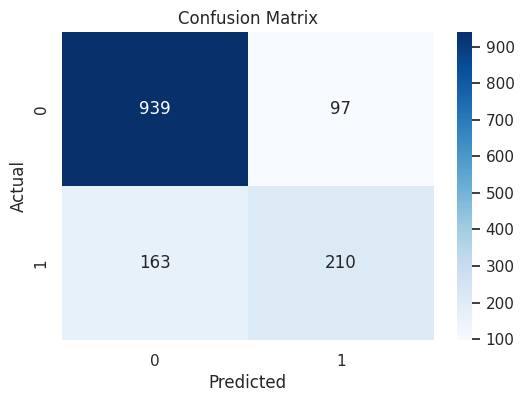

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
